<a href="https://colab.research.google.com/github/dkanh6/Computational_Neuroscience/blob/Custom/HCO_Single_Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Single Cell Spiking Model**

This script will model a single compartment neuron that will have classic AP spiking activity.


## **Notebook Setup**
---

### **Install Neuron**
first install NEURON package, import .h submodule, and matplotlib + numpy


In [74]:
!pip install neuron
from neuron import h
import matplotlib.pyplot as plt
import numpy as np
h.load_file('stdrun.hoc')

1.0

## **Model Setup**
This will be a simple single compartment cell model


### **Initalize the Model**


In [75]:
### Creating the Cell Body ###
soma = h.Section(name='soma')
soma.nseg = 4 # determines how many indivdual segments to divide a given Section into

print("*******Default Soma Values*******") # These values are not realistic for a human neuron as these values are derived from the Hodgkin Huxley Squid Giant Neuron experimental alue
print("Length:             {}  um".format(str(soma.L)))
print("Diameter:           {}  um".format(str(soma.diam)))
print("Capacitance:        {}  uF/cm^2".format(str(soma.cm)))
print("Axial Resistance:   {}  ohm-cm\n".format(str(soma.Ra)))


soma.L = 30 #um
soma.diam = 30 #um
soma.cm = 1.4884e-4/6.2832e-4 # membrane capacitance uF/cm2 <-- Located in S1
print("*******Adjusted Soma Values*******")
print("Length:             {}  um".format(str(soma.L)))
print("Diameter:           {}  um".format(str(soma.diam)))
print("Capacitance:        {}  uF/cm^2".format(str(soma.cm))) # per Lecture S3+
print("Axial Resistance:   {}  ohm-cm\n".format(str(soma.Ra)))



*******Default Soma Values*******
Length:             100.0  um
Diameter:           500.0  um
Capacitance:        1.0  uF/cm^2
Axial Resistance:   35.4  ohm-cm

*******Adjusted Soma Values*******
Length:             30.0  um
Diameter:           30.0  um
Capacitance:        0.23688566335625158  uF/cm^2
Axial Resistance:   35.4  ohm-cm



### **Adding the Cells Biophysics (Channel Characteristics)**

Inserting the Hodgkin Huxley channels and redefining specific conductances


In [76]:
soma.insert('hh')
print("******Leak Channel******")
print("Default Eleak = {} mV \nDefault gleak = {} S/cm^2\n".format(str(soma.el_hh),str(soma.gl_hh)))
soma.el_hh = -50 # mV (From HCOmodel_project_notebook)
soma.gl_hh = 2.0e-5 # S/cm^2 (From S1)  %MIGHT need to change t5o glbar=.03e-3 S/cm^2 and adjust other values to get desired model behavior% or does it need to be the default value?
print("Adjusted Eleak = {} mV \nAdjusted gleak = {} S/cm^2\n".format(str(soma.el_hh),str(soma.gl_hh)))
print("******Sodium Channel******")
print("Default Ena = {} mV \nDefault gna = {} S/cm^2\n".format(str(soma.ena),str(soma.gnabar_hh)))
soma.ena = 50 # mV (from HCOmodel_project_notebook)
soma.gnabar_hh = 0.12 # S/cm^2 (From S1)
print("Adjusted Ena = {} mV \nAdjusted gna = {} S/cm^2\n".format(str(soma.el_hh),str(soma.gl_hh)))
print("******Potassium Channel******")
print("Default Ek = {} mV \nDefault gk = {} S/cm^2\n".format(str(soma.ek),str(soma.gkbar_hh)))
soma.ek = -80 # mV (from HCOmodel_project_notebook)
soma.gkbar_hh = 0.012 # S/cm^2
print("Adjusted Ek = {} mV \nAdjusted gk = {} S/cm^2\n".format(str(soma.ek),str(soma.gkbar_hh)))


******Leak Channel******
Default Eleak = -54.3 mV 
Default gleak = 0.0003 S/cm^2

Adjusted Eleak = -50.0 mV 
Adjusted gleak = 2e-05 S/cm^2

******Sodium Channel******
Default Ena = 50.0 mV 
Default gna = 0.12 S/cm^2

Adjusted Ena = -50.0 mV 
Adjusted gna = 2e-05 S/cm^2

******Potassium Channel******
Default Ek = -77.0 mV 
Default gk = 0.036 S/cm^2

Adjusted Ek = -80.0 mV 
Adjusted gk = 0.012 S/cm^2



# Current Clamp


---



A current clamp will inject a constant current into the soma and is typically used to measure the change in voltage. To set up a current clamp we need to establish 4 parameters (the location (on a scale of 0 -1)), the duration (how long the current is injected for),

In [77]:
ic = h.IClamp(soma(0.5))# 0.5 means that at the middle of the soma a current injection will occur, if soma(0) that would be left side and if soma(1) that would be right side
ic.dur = 2.5 #ms
ic.amp = 0 #nA
ic.delay = 100 #ms



# Running the Simulation


---


Now that the cell is complete, we need to run the simulation, which is going to measure the voltage change due to our current clamp. First we will need to determine how long the simulation should last, how long each time step will be, and set up the vectors to capture the data at each time step.

In [78]:
h.v_init = -50   # This sets the initial voltage to -50mV
h.tstop = tstop = 200 # how long the simulation should run in (ms)
h.dt = 0.025 # time step (resolution) of the simulation in (ms)

#Initalize the vectors that will record the time & voltage
t_vec = h.Vector()
soma_v_vec = h.Vector()

# Record the voltage (_ref_v) and time (_ref_t) and voltage (_ref_v) into the vectors we just created
t_vec.record(h._ref_t)
soma_v_vec.record(soma(0.5)._ref_v)
h.run()  # This command begins the simuation

0.0

# Plotting the Results
The simulation has been run, but we need to display the results in the vector variables in a way that easy to interperet


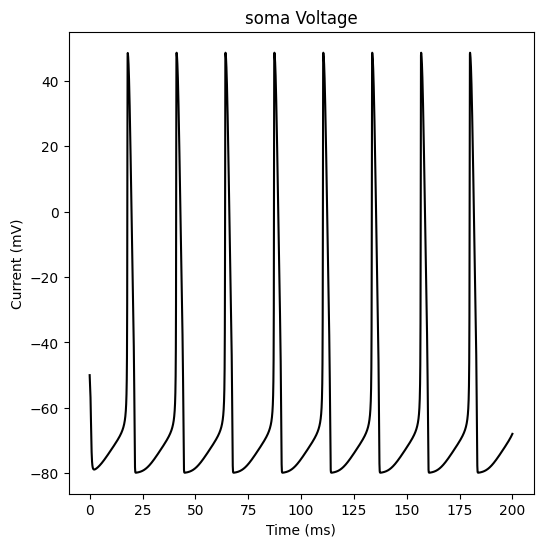

In [79]:
fig, axs = plt.subplots(1,1,figsize=(6, 6))
axs.plot(t_vec,soma_v_vec, color = 'black') # plots t vs V
axs.set_title(str(soma) + " Voltage")
axs.set_xlabel("Time (ms)")
axs.set_ylabel("Current (mV)")
plt.show()